<a href="https://colab.research.google.com/github/ArslanShafique1998/Decision-Treee-and-Random-Forest/blob/main/ML_Ass1_DT%26RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Arslan Shafique (2017-EE-118)**
Section-A

**Libraries**

In [105]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import graphviz 
from graphviz import Source
from IPython.display import SVG

##################################

### ML Models ###
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree.export import export_text
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

##################################

### Metrics ###
from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, classification_report

**Import Data File**

In [106]:
# Load the data.
path = '/content/car.csv'
data = pd.read_csv(path)

# Information
data.info()
# Shape of the data set.
print("The data set has {} rows and {} columns.".format(data.shape[0],data.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1728 non-null   int64
 1   buying      1728 non-null   int64
 2   maint       1728 non-null   int64
 3   doors       1728 non-null   int64
 4   persons     1728 non-null   int64
 5   lug_boot    1728 non-null   int64
 6   safety      1728 non-null   int64
 7   class_val   1728 non-null   int64
dtypes: int64(8)
memory usage: 108.1 KB
The data set has 1728 rows and 8 columns.


In [107]:
# Check for missing values.
data.isna().any()

Unnamed: 0    False
buying        False
maint         False
doors         False
persons       False
lug_boot      False
safety        False
class_val     False
dtype: bool

In [108]:
#Check for duplicate rows.
data.duplicated().any()

False

In [109]:
# Checking the values from each column.
for col in data.columns:
    print("Column:", col)
    print(data[col].value_counts(),'\n')

Column: Unnamed: 0
1727    1
1158    1
1136    1
1138    1
1140    1
       ..
583     1
585     1
587     1
589     1
0       1
Name: Unnamed: 0, Length: 1728, dtype: int64 

Column: buying
4    432
3    432
2    432
1    432
Name: buying, dtype: int64 

Column: maint
4    432
3    432
2    432
1    432
Name: maint, dtype: int64 

Column: doors
6    432
4    432
3    432
2    432
Name: doors, dtype: int64 

Column: persons
5    576
4    576
2    576
Name: persons, dtype: int64 

Column: lug_boot
3    576
2    576
1    576
Name: lug_boot, dtype: int64 

Column: safety
3    576
2    576
1    576
Name: safety, dtype: int64 

Column: class_val
1    1210
2     384
3      69
4      65
Name: class_val, dtype: int64 



**Plotting Values**

In [111]:
# Plotting the values of each column.
for i in data.columns:
    labels = data[i].unique()
    values = data[i].value_counts()
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(title=go.layout.Title(text='Value distribution for column: "{}"'.format(i),x=.5))
    fig.show()

In [112]:
# The data set after the conversion.
data.head()


,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class_val
0,0,4,4,2,2,1,1,1
1,1,4,4,2,2,1,2,1
2,2,4,4,2,2,1,3,1
3,3,4,4,2,2,2,1,1
4,4,4,4,2,2,2,2,1


**Correlation Matrix**

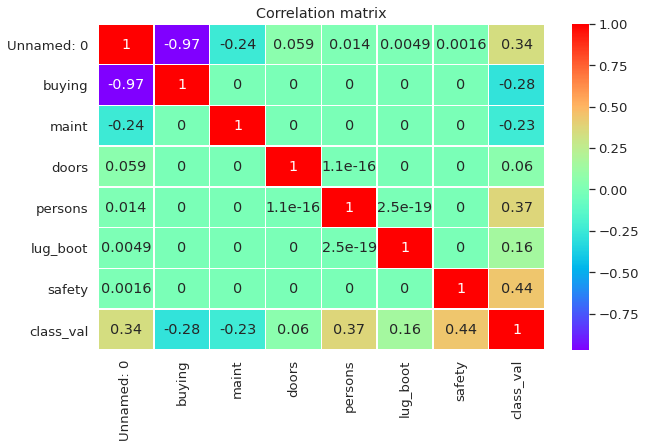

In [113]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
sns.heatmap(data.corr(),annot=True, cmap='rainbow',linewidth=0.5)
plt.title('Correlation matrix');

In [114]:
# Choose attribute columns and class column.
X=data[data.columns[:-1]]
y=data['class_val']

**Splitting and Shuffling Data**

In [115]:
# Split to train and test sets.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=21)
# check the shape of X_train and X_test
print(X_train.shape, X_test.shape)
print(X_train1.shape, X_test1.shape)
print(X_train2.shape, X_test2.shape)

(1209, 7) (519, 7)
(1209, 7) (519, 7)
(1209, 7) (519, 7)


**Decision Tree**

First Accuracy

In [116]:
# Initialize a decision tree estimator.
tr = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)

# Train the estimator.
tr.fit(X_train1, y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [117]:
# Initialize a decision tree estimator.
tr = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=0)

# Train the estimator.
tr.fit(X_train2, y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [118]:
# Initialize a decision tree estimator.
tr = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=21)

# Train the estimator.
tr.fit(X_train3, y_train3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=21, splitter='best')

Plot of Tree

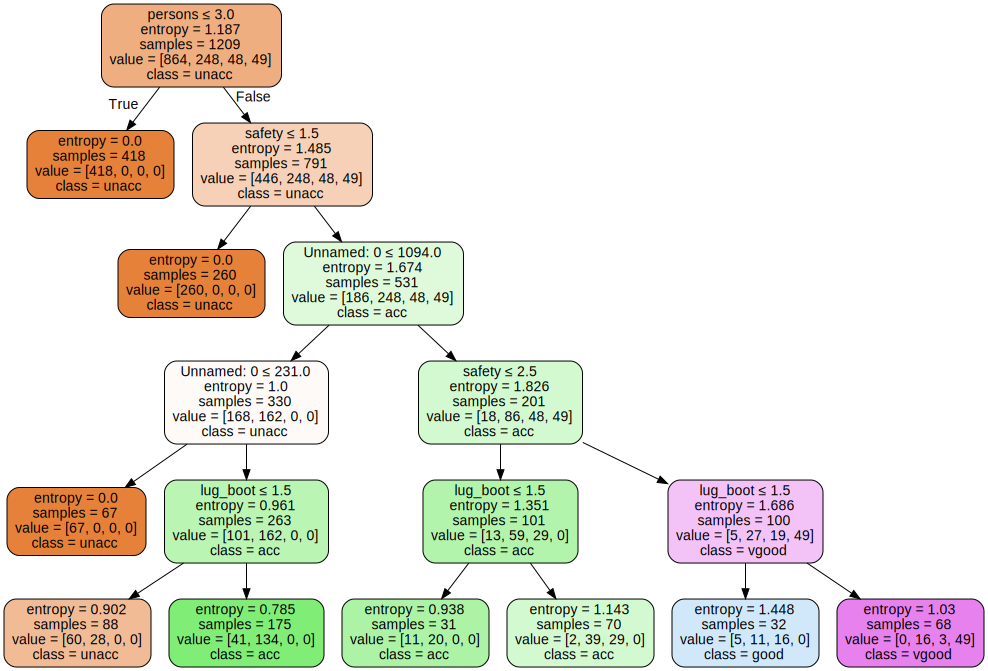

In [119]:
# Plot the tree.
dot_data = tree.export_graphviz(tr, out_file=None, feature_names=X.columns,class_names=['unacc', 'acc', 'good', 'vgood'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

Make Predictions

In [120]:
# Make predictions.
tr_pred=tr.predict(X_test1)

# CV score
tr_cv = cross_val_score(tr,X_train1,y_train1,cv=10)

In [121]:
# Make predictions.
tr_pred=tr.predict(X_test2)

# CV score
tr_cv = cross_val_score(tr,X_train2,y_train2,cv=10)

In [122]:
# Make predictions.
tr_pred=tr.predict(X_test3)

# CV score
tr_cv = cross_val_score(tr,X_train3,y_train3,cv=10)

Accuracy

In [123]:
# The mean squared error (relative error).
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test1, tr_pred))

# Explained average absolute error (average error).
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test1, tr_pred))

# Explained variance score: 1 is perfect prediction.
acc1=tr.score(X_test1,y_test1)
print('Accuracy: %.3f' % tr.score(X_test1, y_test1))

# CV Accuracy
print('CV Accuracy: %.3f' % tr_cv.mean())

Mean squared error (MSE): 1.154
Mean absolute error (MAE): 0.661
Accuracy: 0.898
CV Accuracy: 0.878


In [124]:
# The mean squared error (relative error).
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test2, tr_pred))

# Explained average absolute error (average error).
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test2, tr_pred))

# Explained variance score: 1 is perfect prediction.
acc2=tr.score(X_test2,y_test2)
print('Accuracy: %.3f' % tr.score(X_test2, y_test2))

# CV Accuracy
print('CV Accuracy: %.3f' % tr_cv.mean())

Mean squared error (MSE): 1.175
Mean absolute error (MAE): 0.655
Accuracy: 0.850
CV Accuracy: 0.878


In [125]:
# The mean squared error (relative error).
print("Mean squared error (MSE): %.3f" % mean_squared_error(y_test3, tr_pred))

# Explained average absolute error (average error).
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test3, tr_pred))

# Explained variance score: 1 is perfect prediction.
acc3=tr.score(X_test3,y_test3)
print('Accuracy: %.3f' % tr.score(X_test3, y_test3))

# CV Accuracy
print('CV Accuracy: %.3f' % tr_cv.mean())

Mean squared error (MSE): 0.168
Mean absolute error (MAE): 0.145
Accuracy: 0.867
CV Accuracy: 0.878


In [126]:
import numpy as np

random_model1 = np.array([acc1, acc2, acc3])
print(random_model1)

[0.89788054 0.84971098 0.86705202]


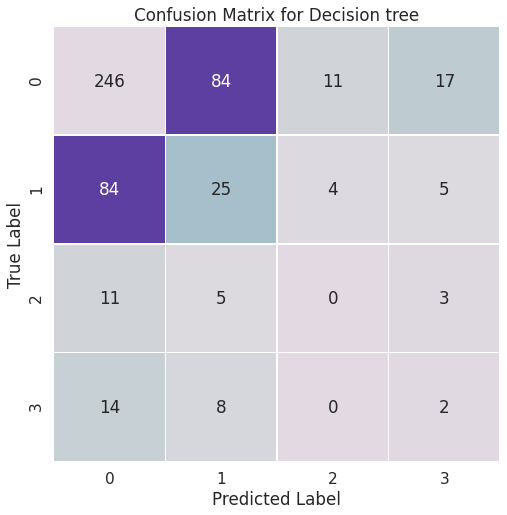

In [127]:
# Print confusion matrix for Decision tree.
tr_matrix = confusion_matrix(y_test1,tr_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision tree');

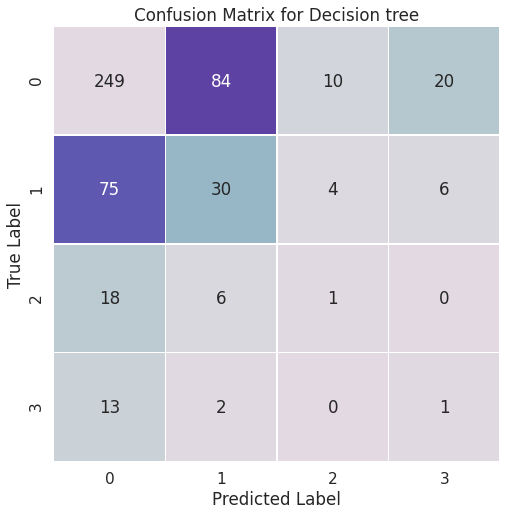

In [128]:
# Print confusion matrix for Decision tree.
tr_matrix = confusion_matrix(y_test2,tr_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision tree');

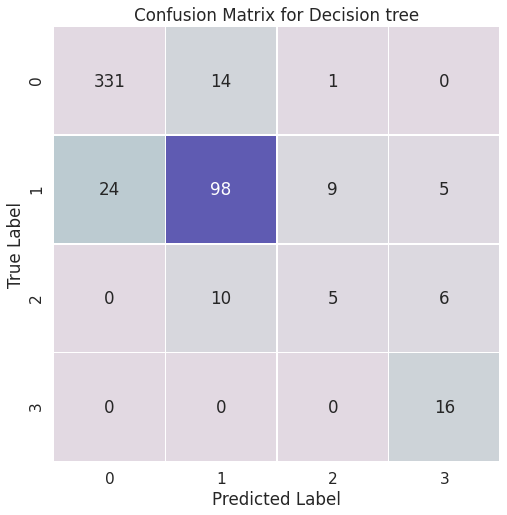

In [129]:
# Print confusion matrix for Decision tree.
tr_matrix = confusion_matrix(y_test3,tr_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision tree');

**Random Forest**

In [130]:
!pip install category_encoders

Importing Category Encoder

In [131]:
# import category encoders
import category_encoders as ce

# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train1 = encoder.fit_transform(X_train1)
X_test1 = encoder.transform(X_test1)

In [132]:
# import category encoders
import category_encoders as ce

# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train2 = encoder.fit_transform(X_train2)
X_test2 = encoder.transform(X_test2)

In [133]:
# import category encoders
import category_encoders as ce

# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train3 = encoder.fit_transform(X_train3)
X_test3 = encoder.transform(X_test3)

In [134]:
X_train1.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety
1178,1178,1,1,1,1,1,1
585,585,2,2,2,2,2,2
1552,1552,3,1,2,1,3,3
1169,1169,1,1,1,3,1,1
1033,1033,1,2,3,3,1,3


In [135]:
X_train2.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety
580,580,1,1,1,1,1,1
1214,1214,2,2,2,2,2,2
1665,1665,3,2,1,2,3,3
661,661,1,3,2,1,1,1
587,587,1,1,1,2,3,2


In [136]:
X_train3.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety
1345,1345,1,1,1,1,1,1
300,300,2,2,2,2,1,2
989,989,3,3,3,3,2,3
1588,1588,1,2,4,1,1,1
1196,1196,3,4,3,2,2,3


Apply Random Forest Classifier

In [137]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)
rfc1 = RandomForestClassifier(random_state=0)
rfc2 = RandomForestClassifier(random_state=0)

In [138]:
# fit the model
rfc.fit(X_train1, y_train1)
rfc1.fit(X_train2, y_train2)
rfc2.fit(X_train3, y_train3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Predicted Result

In [139]:
# Predict the Test set results

y_pred = rfc.predict(X_test1)
y_pred1 = rfc1.predict(X_test2)
y_pred2 = rfc2.predict(X_test3)

Accuracy

In [140]:
# Check accuracy score 

from sklearn.metrics import accuracy_score
accone=accuracy_score(y_test1, y_pred)
acctwo=accuracy_score(y_test2, y_pred1)
accthree=accuracy_score(y_test3, y_pred2)
print('Model accuracy score with 10 decision-trees split 0 : {0:0.4f}'. format(accuracy_score(y_test1, y_pred)))
print('Model accuracy score with 10 decision-trees split 1 : {0:0.4f}'. format(accuracy_score(y_test2, y_pred1)))
print('Model accuracy score with 10 decision-trees split 2 : {0:0.4f}'. format(accuracy_score(y_test3, y_pred2)))

Model accuracy score with 10 decision-trees split 0 : 0.9383
Model accuracy score with 10 decision-trees split 1 : 0.9576
Model accuracy score with 10 decision-trees split 2 : 0.9306


In [141]:
import numpy as np

random_model2 = np.array([accone, acctwo, accthree])
print(random_model2)

[0.93834297 0.95761079 0.93063584]


**T-Test**

In [142]:
import scipy.stats as stats
stats.ttest_ind(a=random_model1, b=random_model2, equal_var=True)


Ttest_indResult(statistic=-4.358358684626799, pvalue=0.01207765656998119)